In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist.data, mnist.target

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

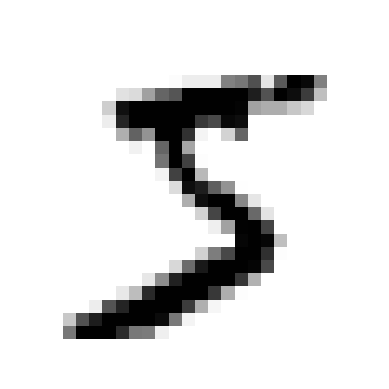

'5'

In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
plt.show()
y[0]

In [6]:
n = 60000
X_train, X_test, y_train, y_test = X[:n], X[n:], y[:n], y[n:]

In [7]:
# Data Augmentation

from scipy.ndimage import shift
import numpy as np

def shift_image(image, dx, dy):
    return shift(image.reshape((28, 28)), [dy, dx], cval=0, mode='constant').reshape([-1])

shifts_to_make = [(0, 1), (1, 0), (0, -1), (-1, 0)]

X_train_aug = [image for image in X_train]
y_train_aug = [label for label in y_train]

for dx, dy in shifts_to_make:
    for image, label in zip(X_train, y_train):
        X_train_aug.append(shift_image(image, dx, dy))
        y_train_aug.append(label)

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

In [8]:
shuffle_idx = np.random.permutation(len(X_train_aug))
X_train_augmented = np.array(X_train_aug)[shuffle_idx]
y_train_augmented = np.array(y_train_aug)[shuffle_idx]

In [ ]:
# Modelling

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

classification_reports = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_aug, y_train_aug)
    y_pred = model.predict(X_test)
    print(f"Evaluating {name}...")
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report
    print(f"Classification report for {name}:\n{report}")

Training RandomForest...


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['accuracy', 'precision', 'recall', 'f1-score']
df_metrics = pd.DataFrame()

for model_name, report in classification_reports.items():
    # Extract metrics for each model. Using 'weighted avg' accounts for class imbalance by weighting metrics according to class support.
    data = {
        'Model': model_name,
        'Accuracy': report.get('accuracy', None),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }
    df_metrics = df_metrics.append(data, ignore_index=True)

df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted)
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()